In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import random

In [12]:
WB = 0.365
MAX_LINEAR_SPEED = 25
MAX_STEER_ANGLE = 1.57

In [13]:
class PathFinderController:
    def __init__(self, Kp_rho, Kp_alpha, Kp_beta):
        self.Kp_rho = Kp_rho
        self.Kp_alpha = Kp_alpha
        self.Kp_beta = Kp_beta
        
    def calc_control_command(self, x_diff, y_diff, theta, theta_goal):
        rho = np.hypot(x_diff, y_diff)
        alpha = (np.arctan2(y_diff, x_diff)
                 - theta + np.pi) % (2 * np.pi) - np.pi
        beta = (theta_goal - theta - alpha + np.pi) % (2 * np.pi) - np.pi
        v = self.Kp_rho * rho
        w = self.Kp_alpha * alpha - controller.Kp_beta * beta
        steer_angle = math.atan(w*WB/v)
        if alpha > np.pi / 2 or alpha < -np.pi / 2:
            v = -v
        

        return rho, v, steer_angle
        
    

In [14]:
def transformation_matrix(x, y, theta):
        return np.array([
            [np.cos(theta), -np.sin(theta), x],
            [np.sin(theta), np.cos(theta), y],
            [0, 0, 1]
        ])

In [15]:
def move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal):
        x = x_start
        y = y_start
        theta = theta_start

        x_diff = x_goal - x
        y_diff = y_goal - y

        x_traj, y_traj = [], [] # For Plots

        rho = np.hypot(x_diff, y_diff)
        while rho > 0.001:
            x_traj.append(x)
            y_traj.append(y)

            x_diff = x_goal - x
            y_diff = y_goal - y

            rho, v, steer_angle = controller.calc_control_command(
                x_diff, y_diff, theta, theta_goal)

            if abs(v) > MAX_LINEAR_SPEED:
                v = np.sign(v) * MAX_LINEAR_SPEED

            if abs(steer_angle) > MAX_STEER_ANGLE:
                steer_angle = np.sign(steer_angle) * MAX_STEER_ANGLE
            
            theta = theta + (v*math.tan(steer_angle) / WB) * dt # YAW from BNO055
            x = x + v * np.cos(theta) * dt # X Co-ordinate from BNO055
            y = y + v * np.sin(theta) * dt # Y Co-ordinate from BNO055
            print(x)
            print(y)
            print(steer_angle)

            if show_animation:  # pragma: no cover
                plt.cla()
                plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
                plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
                plot_vehicle(x, y, theta, x_traj, y_traj)

In [16]:
def plot_vehicle(x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')

    plt.plot(x_traj, y_traj, 'b--')

    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect(
        'key_release_event',
        lambda event: [exit(0) if event.key == 'escape' else None])

    plt.xlim(-20, 20)
    plt.ylim(-20, 20)

    plt.pause(dt)

In [17]:
controller = PathFinderController(10, 20, 5)
dt = 0.01

# Robot specifications
MAX_LINEAR_SPEED = 15
MAX_ANGULAR_SPEED = 7

show_animation = True

In [18]:
def main():
    x_start = 20*random()
    y_start = 20*random()
    theta_start = 2 * np.pi * random() - np.pi
    x_goal = 20*random()
    y_goal = 20*random()
    theta_goal = 2 * np.pi * random() - np.pi
    print("Initial x: %.2f m\nInitial y: %.2f m\nInitial theta: %.2f rad\n" %
        (x_start, y_start, theta_start))
    print("Goal x: %.2f m\nGoal y: %.2f m\nGoal theta: %.2f rad\n" %
        (x_goal, y_goal, theta_goal))
    move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal)

Initial x: 8.81 m
Initial y: 11.42 m
Initial theta: 1.29 rad

Goal x: 19.54 m
Goal y: 7.30 m
Goal theta: 1.96 rad

8.780473932062012
11.270274978809933
-0.14154408696730789


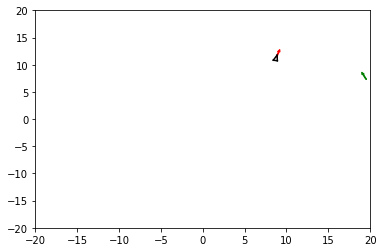

8.756780750654908
11.122158021121725
-0.14444534248412955


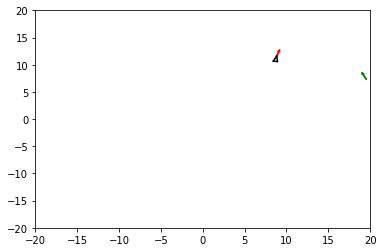

8.742171653380485
10.972871135305098
-0.14752461037418832


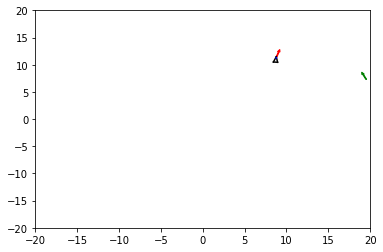

8.736907242920568
10.82296354382785
-0.15079680419740094


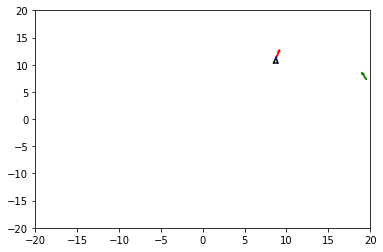

8.741227640518252
10.673025776188746
-0.1542783209385897


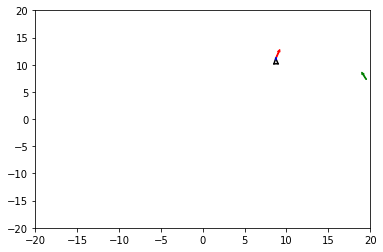

8.755348477514058
10.523691915452014
-0.15798720302029423


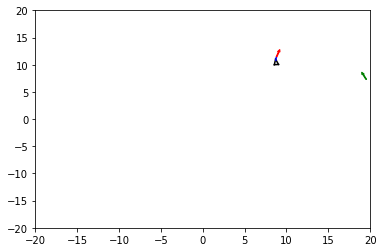

8.779456244822603
10.375641871360845
-0.16194331351552713


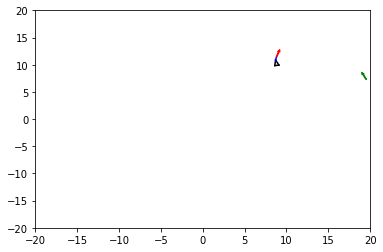

8.813702893756066
10.229603633091452
-0.16616852310895602


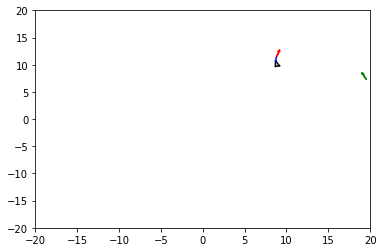

8.858199564960488
10.086355435016483
-0.17068690580905715


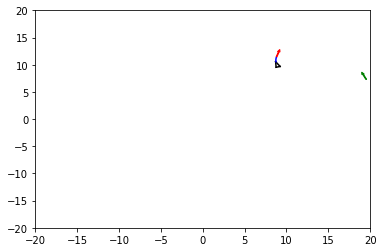

8.913009303954416
9.9467277425217
-0.1755249381166378


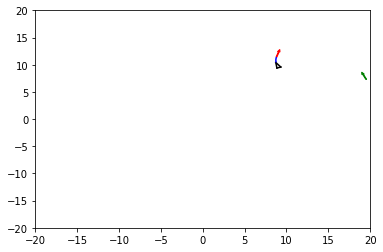

8.978138602331395
9.811604929892143
-0.1807116930017426


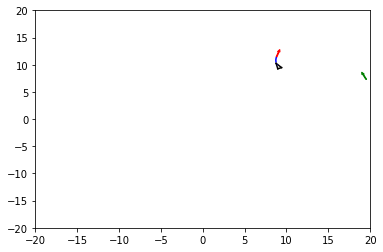

9.053527584096868
9.681926475905502
-0.18627901522031648


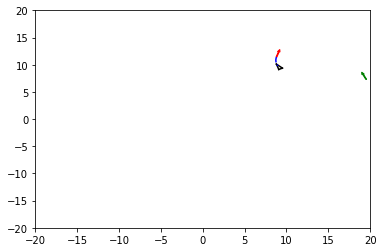

9.139038638645816
9.558687441708027
-0.19226165767230674


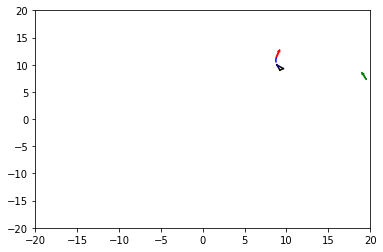

9.234443288583416
9.442937915703451
-0.19869734897241995


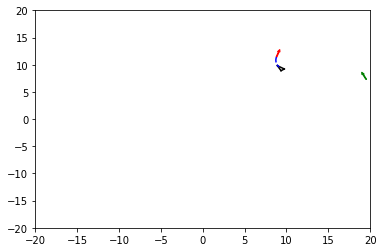

9.3394070768702
9.335781006693873
-0.20562674933210703


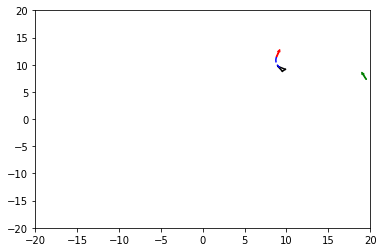

9.453472271366714
9.23836883392028
-0.21309323429304902


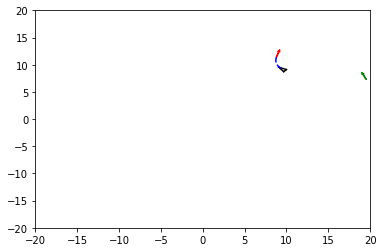

9.576038227557813
9.151895795446073
-0.22114242290821817


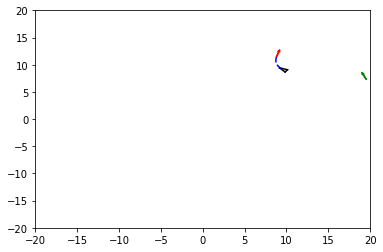

9.706339339555928
9.077588190101434
-0.2298213381093136


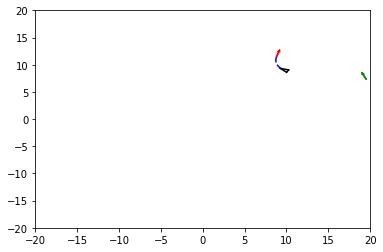

9.843420670576268
9.016689021915884
-0.23917705272633988


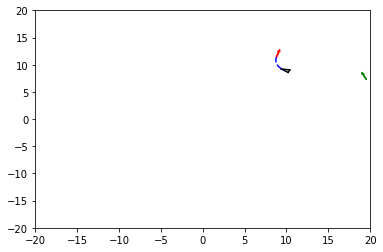

9.98611162173325
8.970436535951173
-0.24925463762638336


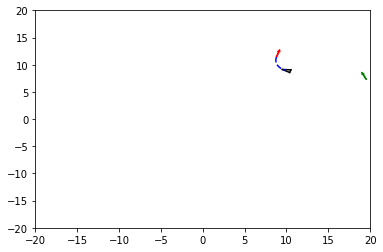

10.132998417834976
8.940034741086887
-0.26009419551087737


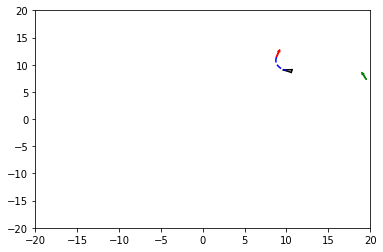

10.282396816019213
8.926613913244157
-0.27172674876931413


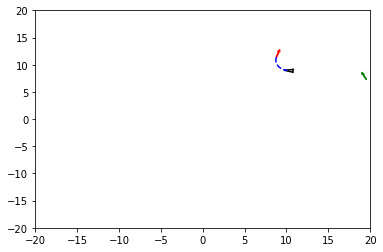

10.430230599754974
8.901213669419183
0.19358139362831775


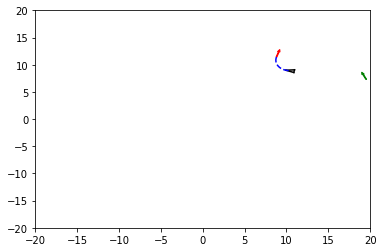

10.575393860391092
8.863429707722576
0.20274612362676575


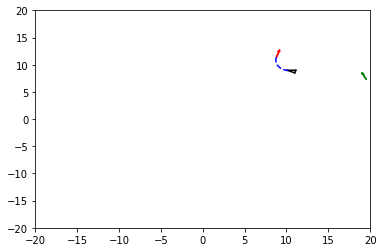

10.724005759613814
8.843070350919978
-0.28070471982115175


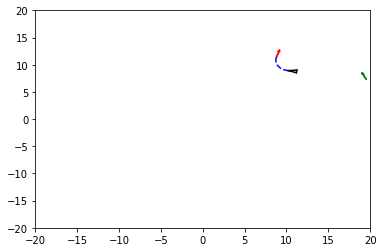

10.870313133478447
8.809992377087923
0.20675151368462563


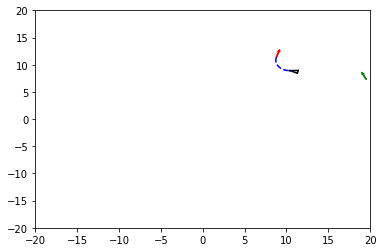

11.019582611012122
8.79520646903926
-0.29218587249226213


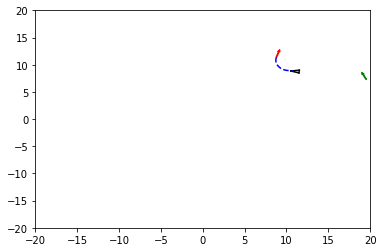

11.166978751036378
8.767378822607164
0.2106348442129494


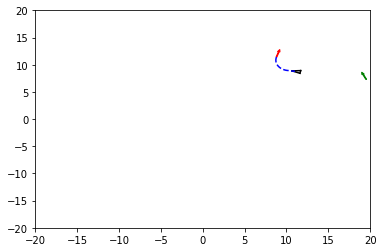

11.316732411352675
8.758785731087135
-0.30477982897378936


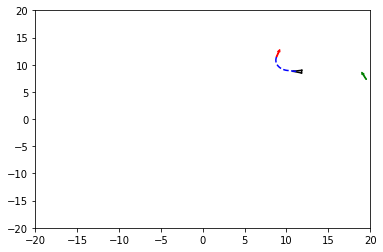

11.465119934520017
8.736850759734034
0.21429732387110026


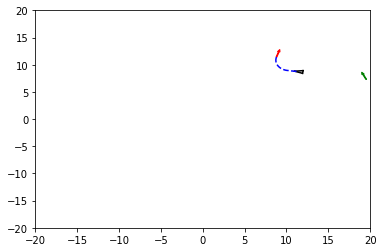

11.61078188226419
8.701037396594364
0.225616291849924


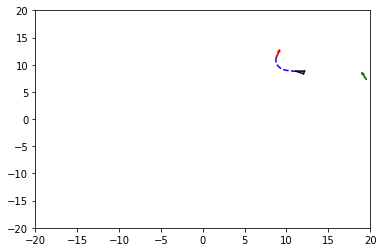

11.759930967089234
8.685082757900496
-0.31633638034006994


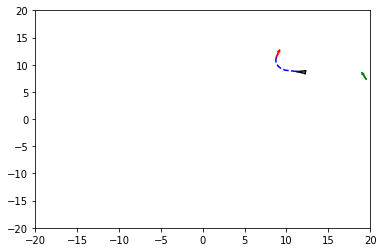

11.906852867091636
8.65485106427139
0.2303356431047938


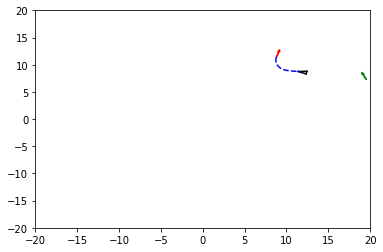

12.056567422000493
8.645601629237675
-0.33102095972022727


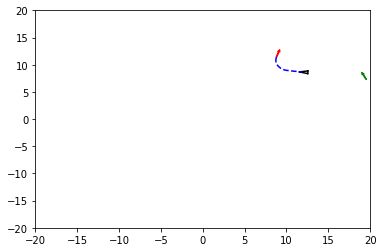

12.2046513773149
8.621703048140864
0.2347937689602212


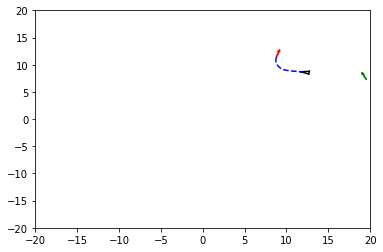

12.349445527837087
8.582528388288376
0.24837167886244124


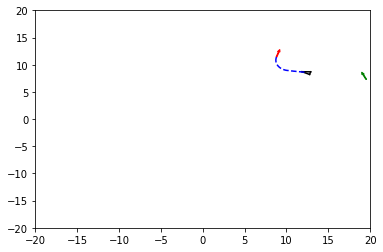

12.498423559348703
8.565048510516386
-0.34444611919464246


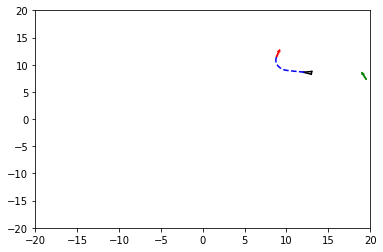

12.644689550611682
8.531788026457093
0.25424907043879197


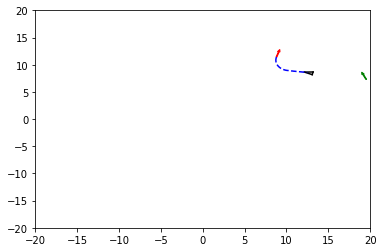

12.794341841170889
8.521580581606258
-0.36171812572938294


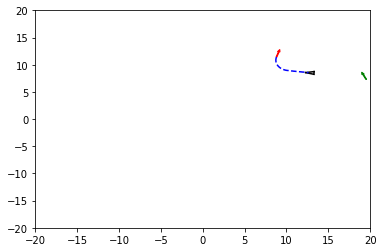

12.9419890209271
8.495117204836898
0.259828595047167


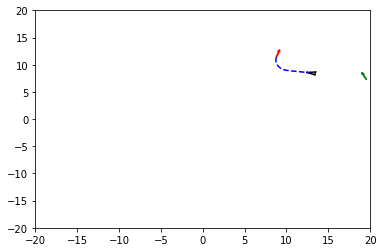

13.085555845924134
8.451659561547471
0.2764183674972455


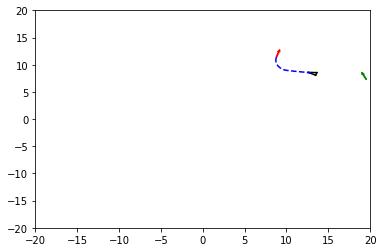

13.234269816547101
8.432059690589963
-0.3773721000926504


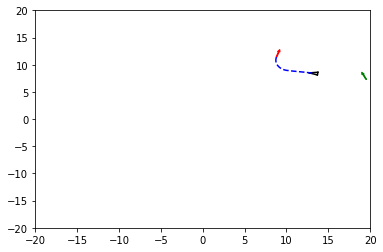

13.379570097575865
8.394806122533168
0.2839742653787526


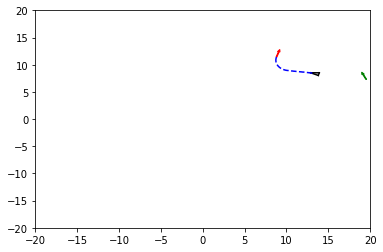

13.529110790963163
8.383076628884833
-0.39784431450317215


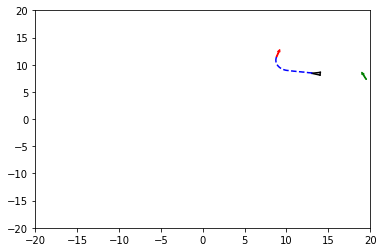

13.676077103684486
8.353061583905717
0.2912247916999775


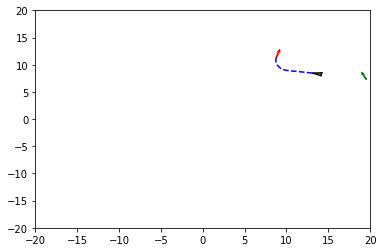

13.826054221746507
8.350441649209799
-0.4209535227742856


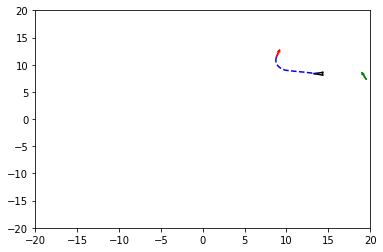

13.97451023663264
8.328975125408109
0.2978034615223776


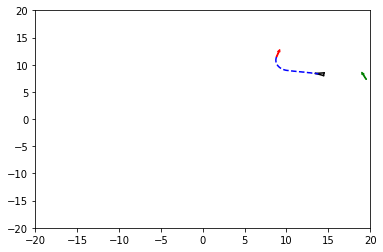

14.11868083489611
8.287564515700538
0.31980904224365897


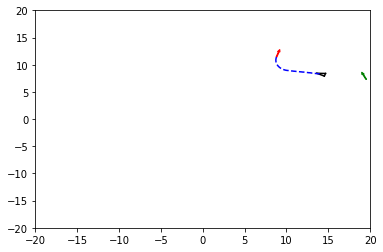

14.2681410036062
8.274850036979348
-0.44271954509875555


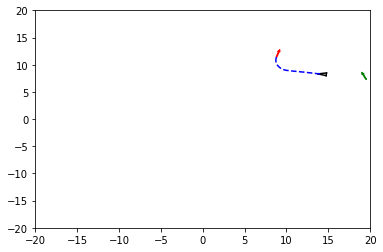

14.414351433167466
8.241346152316376
0.3291956148239698


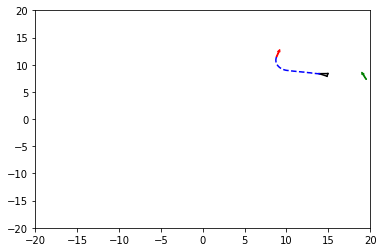

14.564332251821632
8.238947395174444
-0.4709935260629973


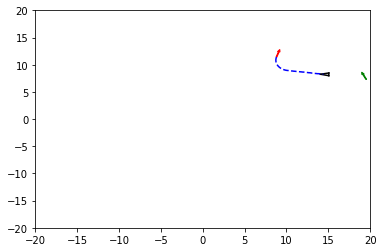

14.712409312678798
8.215006132720195
0.3376845588861599


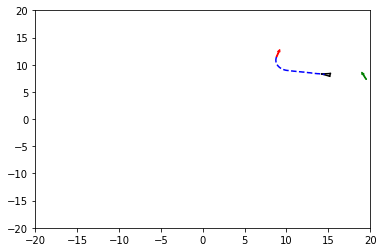

14.8549001410517
8.168140752858253
0.3659036918194087


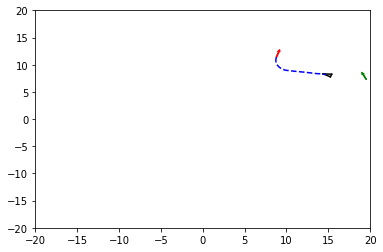

15.0042298489685
8.153976066716888
-0.4975157252760721


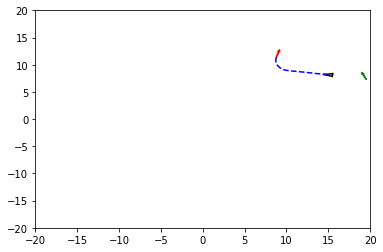

15.14926380428623
8.115698765285172
0.378575479972743


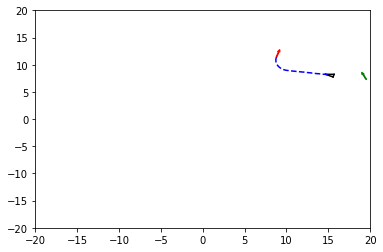

15.299244962090553
8.11332130788807
-0.5325282084044074


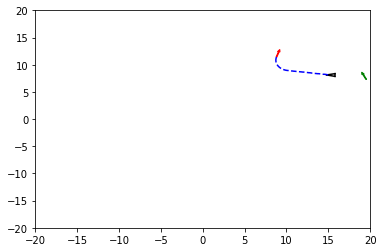

15.446690492187573
8.085756554045368
0.39007969642325274


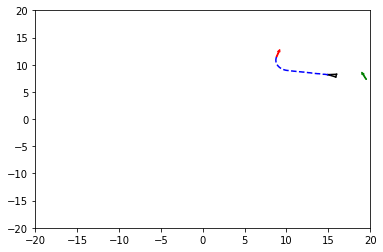

15.586429753497569
8.031231891290457
0.4274437253593386


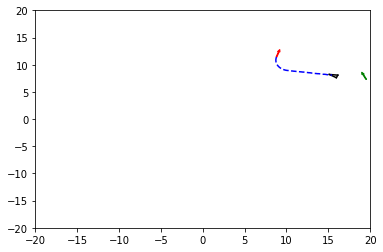

15.735496849123159
8.014528568215349
-0.5648452242512692


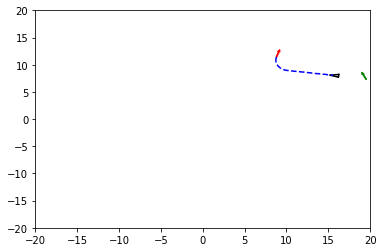

15.878443684186465
7.969073069698846
0.4456005472333483


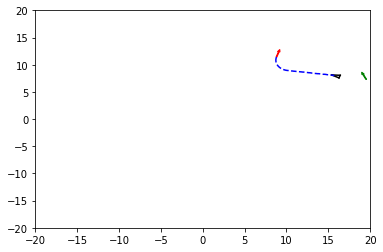

16.028408702068614
7.965833716120332
-0.6084505854725665


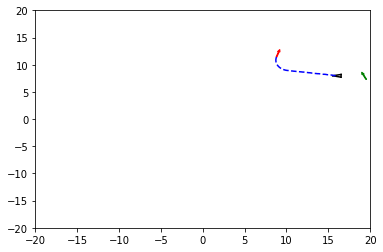

16.174578597715573
7.932153430988574
0.4624579646239221


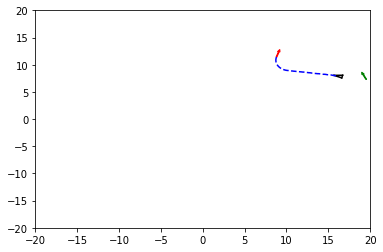

16.323938530950205
7.94599576981359
-0.6598976134082524


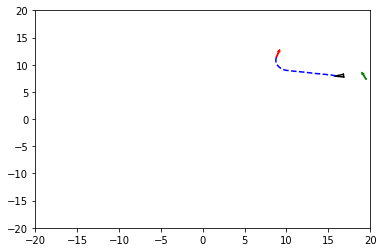

16.472874998537367
7.9281652167470815
0.47542544644158324


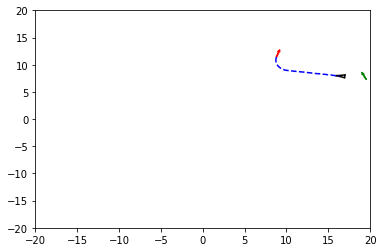

16.61322418271168
7.875230289698819
0.5313182439958308


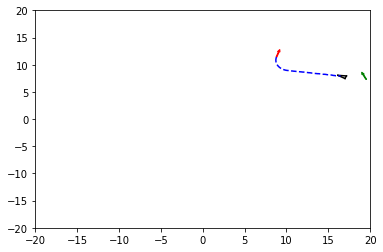

16.763220499121815
7.874179069745268
-0.7106001114490461


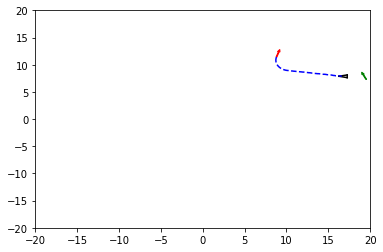

16.908117953561096
7.835388249993469
0.5546011528392422


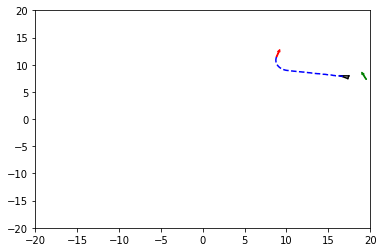

17.0565821416453
7.856798174245966
-0.7778487048831846


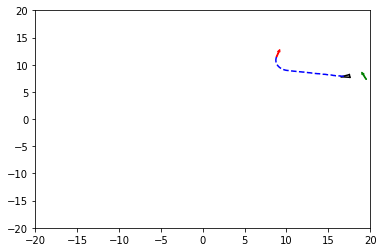

17.205498794629065
7.838802884192381
0.5701181149664342


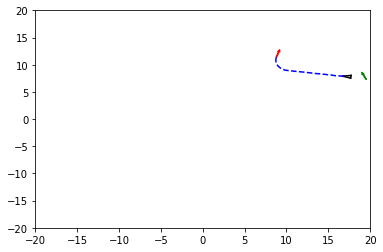

17.34170474646165
7.775970259821125
0.6492981261098536


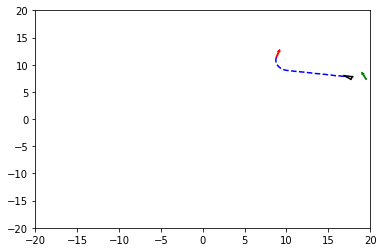

17.491634827711586
7.780549641481128
-0.8446062603263079


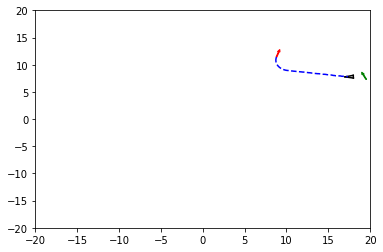

17.634819410885616
7.735848689127973
0.6811917134135063


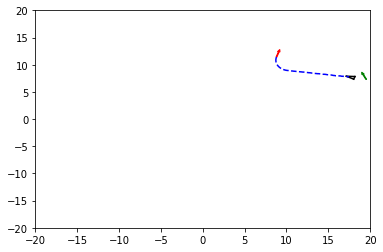

17.780074351883172
7.773278651935807
-0.9332535306882219


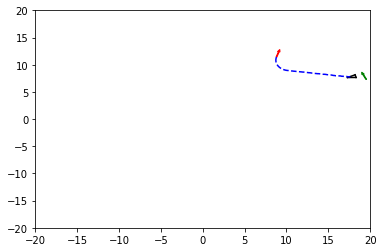

17.929476518066064
7.759899835102492
0.6933625294764216


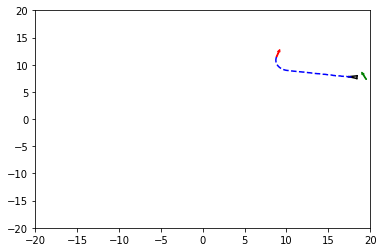

18.059740764855505
7.685527622493349
0.8074110420191833


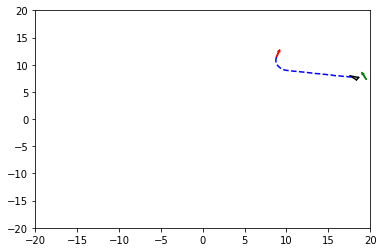

18.207937952011566
7.708713689840608
-1.0232315873569973


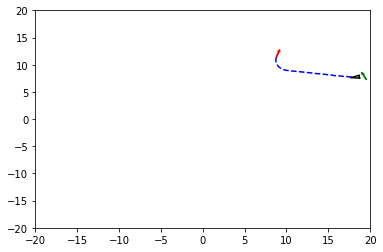

18.34197067479267
7.671644569535676
0.8399593343749985


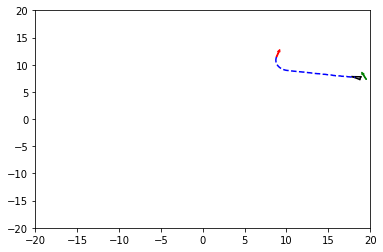

18.431030055992807
7.583699615076324
0.9781939457952752


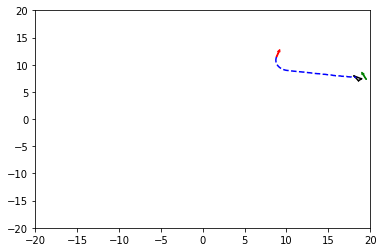

18.54401575400226
7.567057082016354
-1.111631311697479


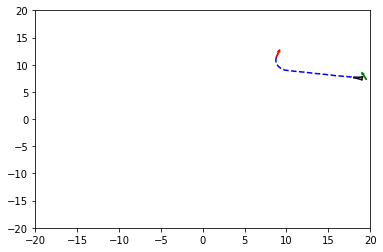

18.626474920199083
7.5055846086579345
1.052731273211133


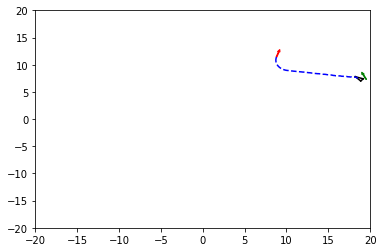

18.719846251106077
7.506758508685104
-1.1974901719874944


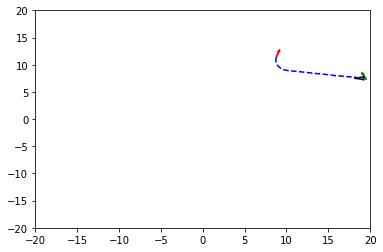

18.795627711472786
7.469788480302586
1.1109576908275893


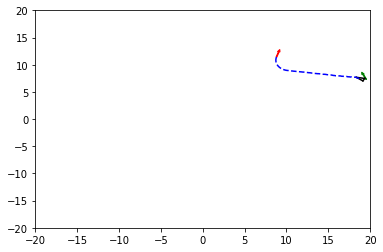

18.869586064130388
7.487673232036646
-1.2778513242299328


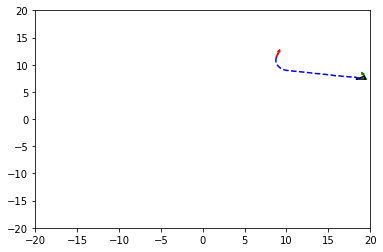

18.937843965633974
7.475405403677889
1.1415279742820634


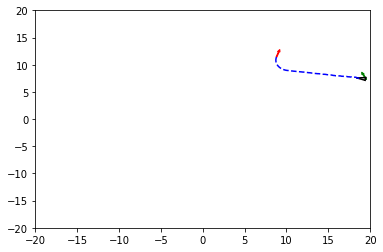

18.986662278945353
7.436460296226671
1.2383435300690904


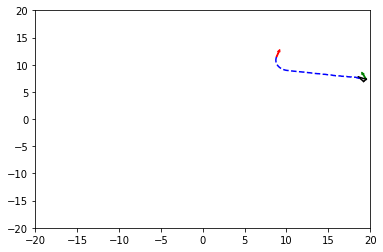

19.04337831544084
7.435217284494588
-1.3365961978178975


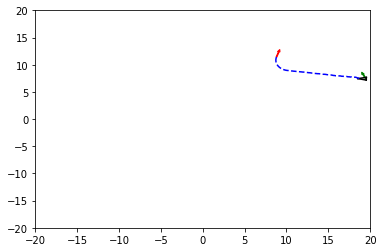

19.088537222371727
7.411081395960328
1.2801071665426833


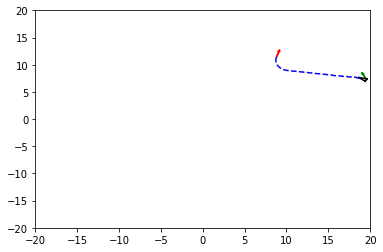

19.13387560917455
7.4201221193888705
-1.388648295457994


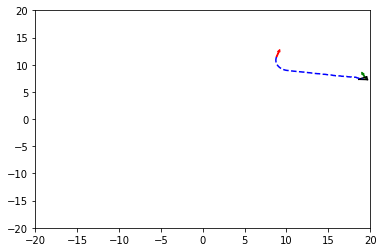

19.174915422646137
7.410813108867423
1.302811928383043


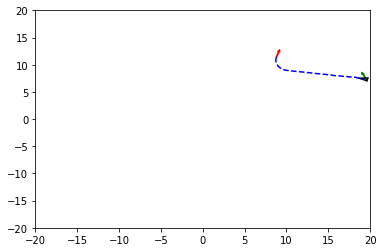

19.20326510284351
7.385685459502892
1.3669847162042748


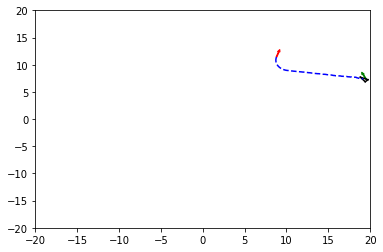

19.237630660237336
7.3828351752936054
-1.4247922215871718


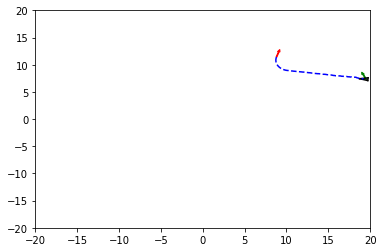

19.26390202864716
7.366218999816054
1.3956304032873392


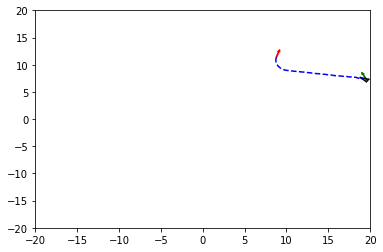

19.2918733161878
7.369223699966138
-1.4564276682469373


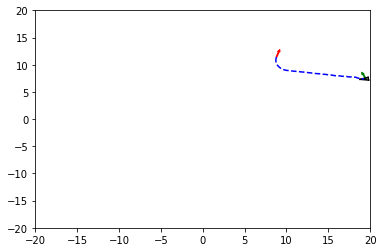

19.315946731006765
7.3608337230051974
1.414197627520033


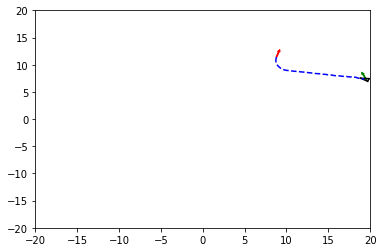

19.33718726336964
7.369527989574073
-1.484148115324503


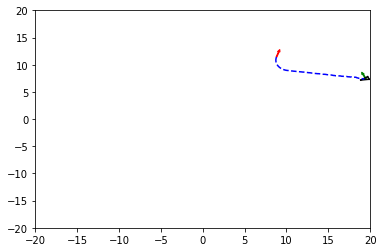

19.358348670975086
7.36988504525017
1.4160233203608745


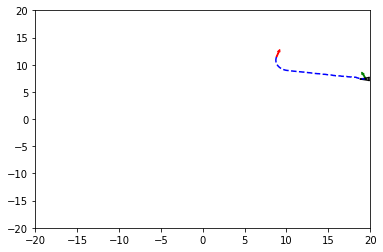

19.37586468178289
7.362065045819739
1.4510463495670434


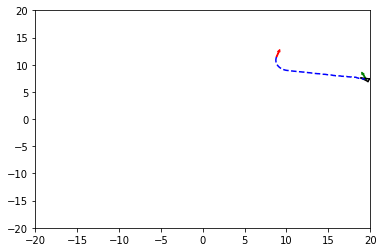

19.392304411273095
7.367348617585201
-1.5061554738006544


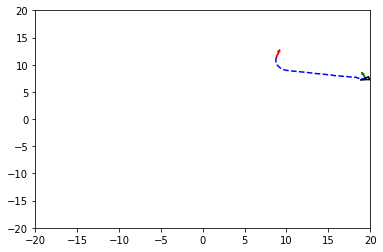

19.408227187373114
7.3665210116318205
1.4509986666412282


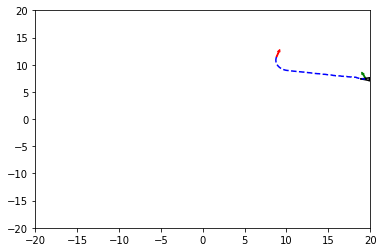

19.4210773599114
7.359872292031383
1.4779146566801986


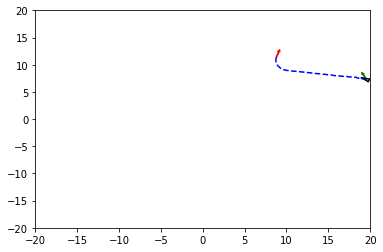

19.43363413555379
7.363320896650123
-1.5229780514808355


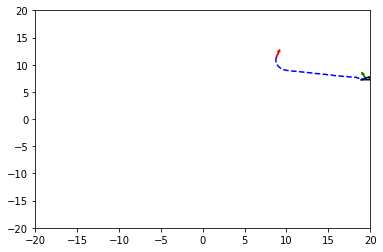

19.445678386714956
7.362402746055174
1.4749211999449836


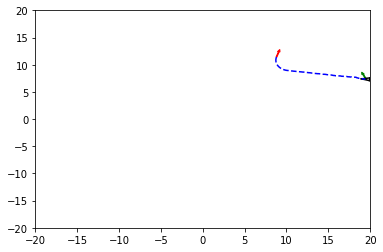

19.455456185664204
7.357349665742773
1.4957223037278666


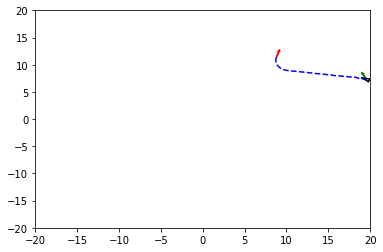

19.46117917099439
7.3492568477425655
1.514079487168317


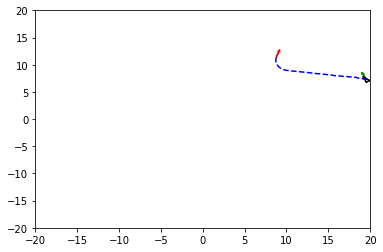

19.469816204024042
7.346750360930914
-1.534192242358537


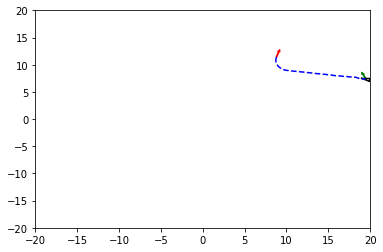

19.475904478274412
7.341363225188961
1.5204407110415783


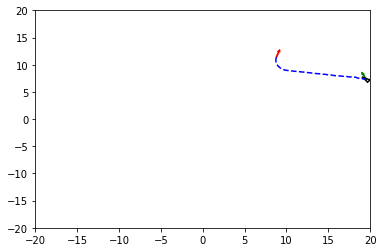

19.48323049987779
7.341348047986893
-1.5430155094183293


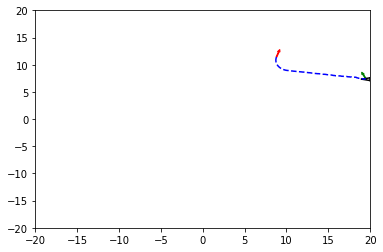

19.489474731329217
7.338872599580511
1.521808536846113


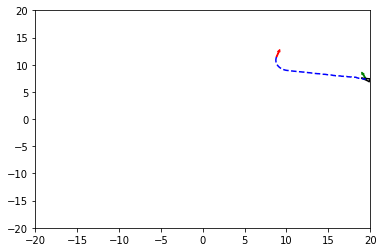

19.493608713983296
7.334431602314352
1.5333544719097243


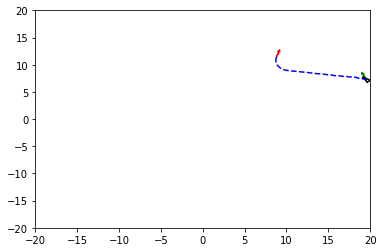

19.49905105246838
7.333875432142499
-1.549963529321727


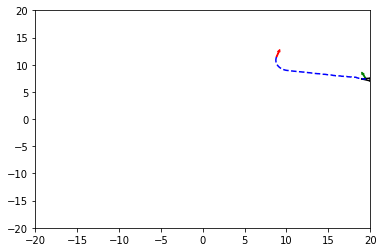

19.503487258366096
7.331557338755577
1.534693717416476


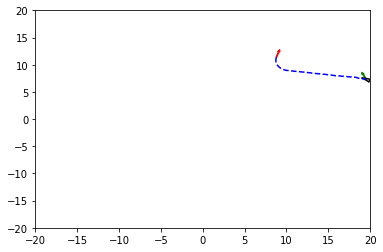

19.506181471427503
7.327932907161282
1.5433109349130003


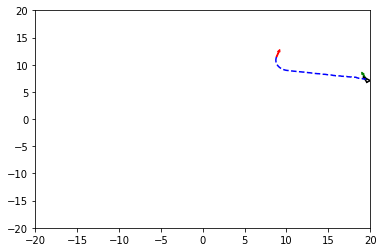

19.51015935226562
7.327038415847339
-1.5550730024993569


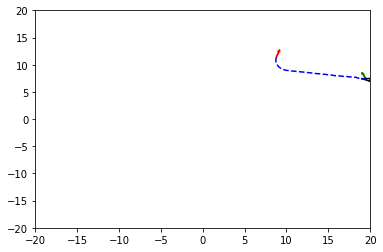

19.513198566367382
7.324899784297589
1.5448291311324571


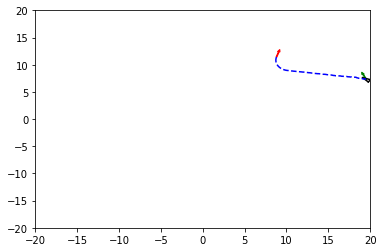

19.514775223167735
7.321946910724365
1.5511680247189457


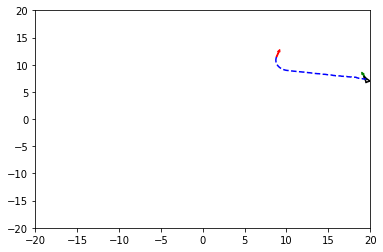

19.51757701415408
7.320783798936745
-1.55869693252416


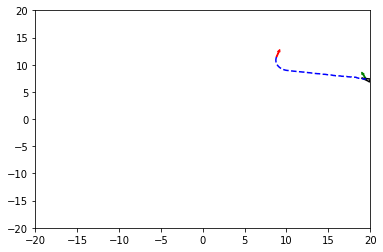

19.519456057513725
7.318780617405893
1.5530460458831445


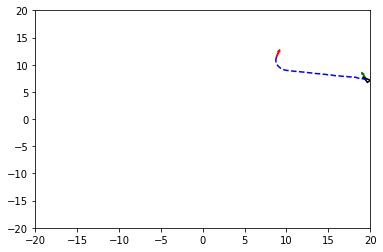

19.521922540465397
7.318603896660857
-1.5617130725142911


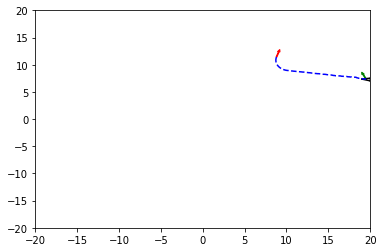

19.524009869750753
7.317680398000445
1.55267324693644


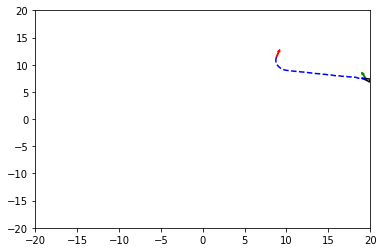

19.525423238547297
7.316164741437232
1.556735103314364


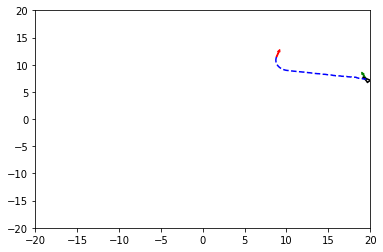

19.525914436788973
7.3143653849416115
1.5602385552917342


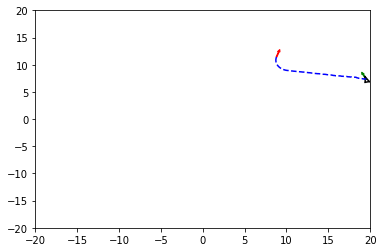

19.527277566986584
7.313348942982889
-1.5637761062133604


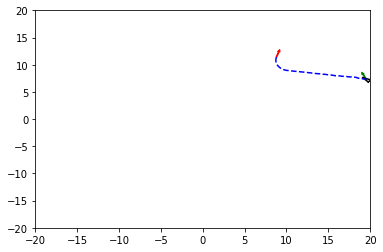

19.527976959244388
7.311985346621704
1.5615922633928405


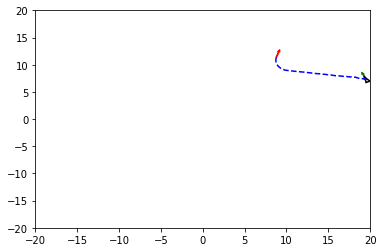

19.529256200744324
7.311451286640386
-1.5653815451223565


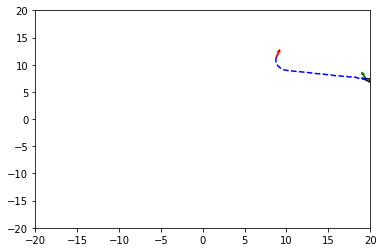

19.5301329564064
7.310548210878123
1.5622756288341262


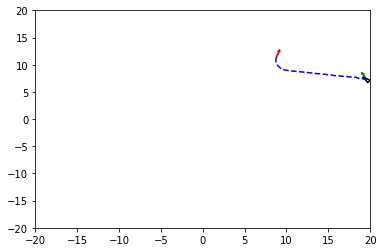

19.53045197866625
7.309461234775138
1.5643989292234495


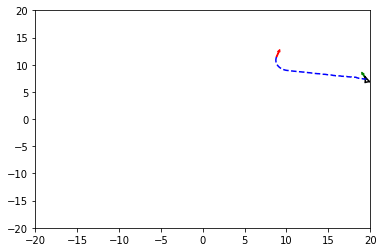

19.531290675611444
7.308858499459454
-1.5665231575042176


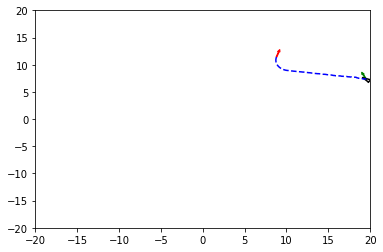

19.531728507797272
7.3080371175821925
1.5652275854254998


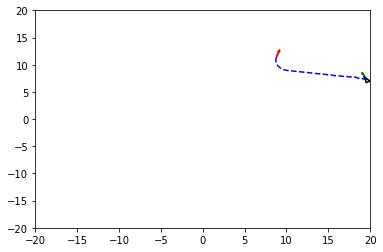

19.53250994700579
7.307723247624714
-1.5674962855579133


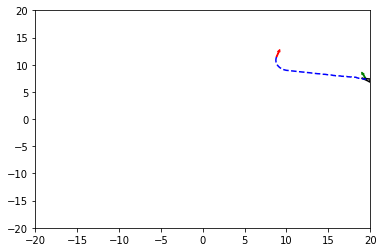

19.533048164409834
7.307180538163497
1.5656590572263125


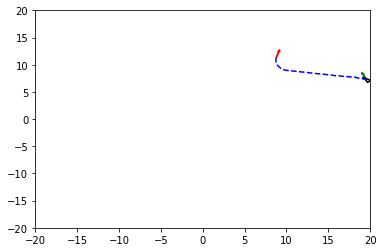

19.53324637107412
7.306521806187745
1.5669419603197716


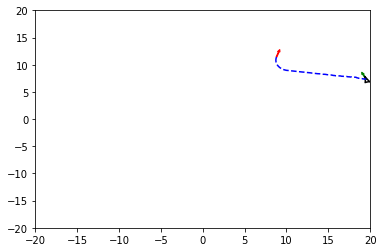

19.53375679832818
7.3061563667679605
-1.5681792293710002


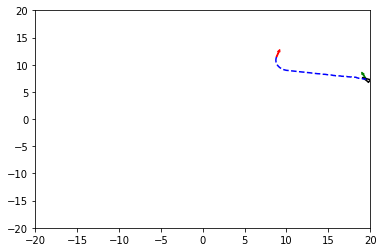

19.53402038069814
7.305656026608861
1.5674613682066199


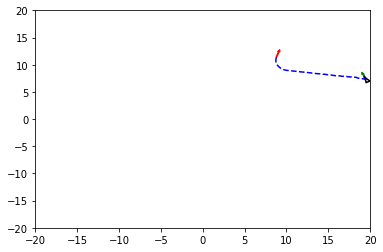

19.53449308200112
7.305458591669256
-1.5687631170682248


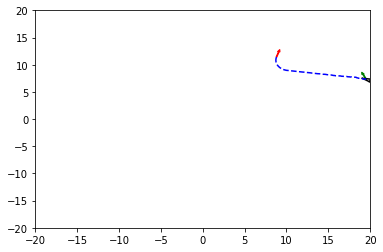

19.534811369110802
7.305120854629519
1.5677646376328886


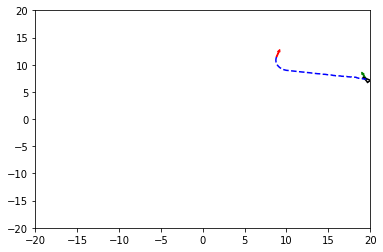

19.535228288369353
7.3050944700637395
-1.5692740179230922


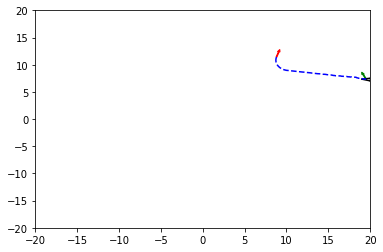

19.535584183705527
7.304943829042275
1.5676564116939458


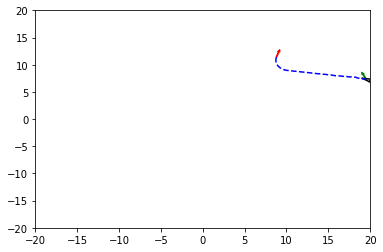

19.535830683880725
7.304693155741533
1.5683478420952708


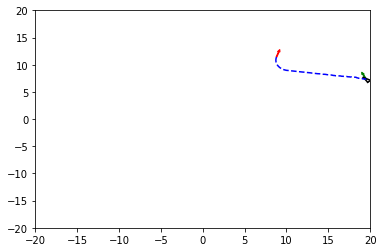

19.535926332891027
7.30439143705527
1.568951337932781


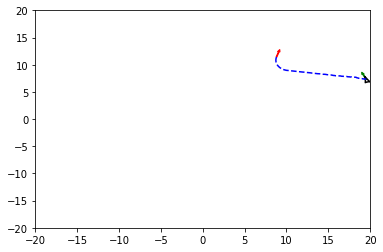

19.536166536152077
7.304233513715392
-1.569641862702519


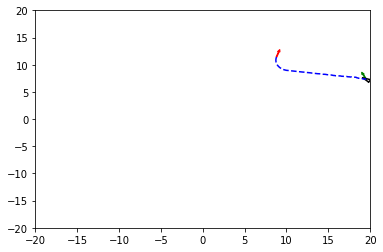

19.536304088199785
7.304013195730924
1.5691455908669831


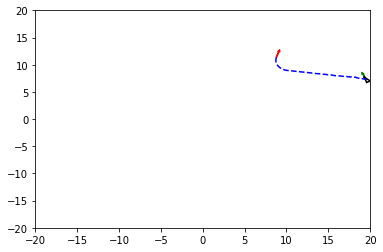

19.53652921899826
7.303949067429066
-1.5699239759984973


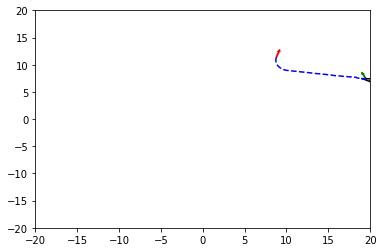

19.536701793509753
7.303821310796858
1.5691611768333251


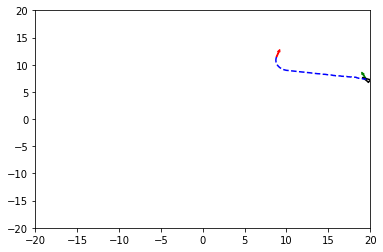

19.5367963900381
7.303651837886485
1.5695434876990308


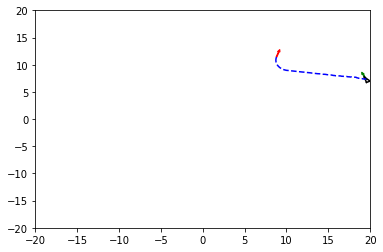

19.53695306200528
7.303574193692003
-1.57


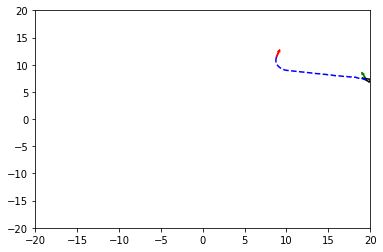

19.537059369982376
7.303455467615894
1.5696485931948476


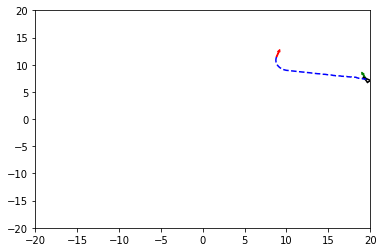

19.53709867090872
7.303317380826438
1.569928002535299


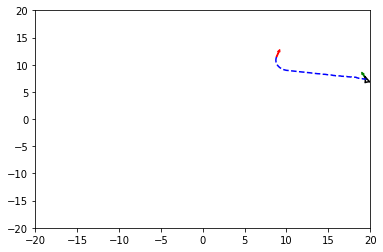

19.537184816099963
7.303220043958967
-1.57


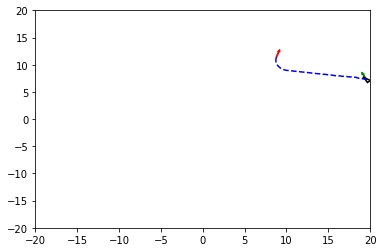

19.537221832477424
7.303108992875667
1.57


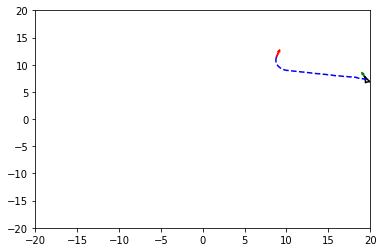

19.53728891787594
7.3030270572871805
-1.57


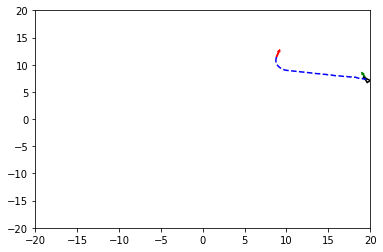

19.537322329657858
7.302937788600639
1.57


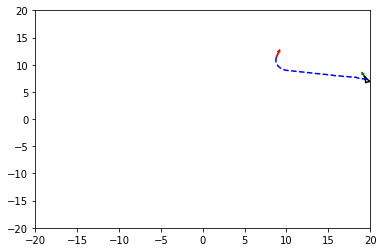

In [19]:
if __name__ == '__main__':
    main()